In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

petrol_data = pd.read_csv('petrol_data.csv')

In [14]:
print(petrol_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bensin95           248 non-null    float64
 1   bensin95_discount  248 non-null    float64
 2   company            248 non-null    object 
 3   diesel             248 non-null    float64
 4   diesel_discount    248 non-null    float64
 5   geo                248 non-null    object 
 6   key                248 non-null    object 
 7   name               248 non-null    object 
dtypes: float64(4), object(4)
memory usage: 15.6+ KB
None


315.5770161290323
317.5806451612903


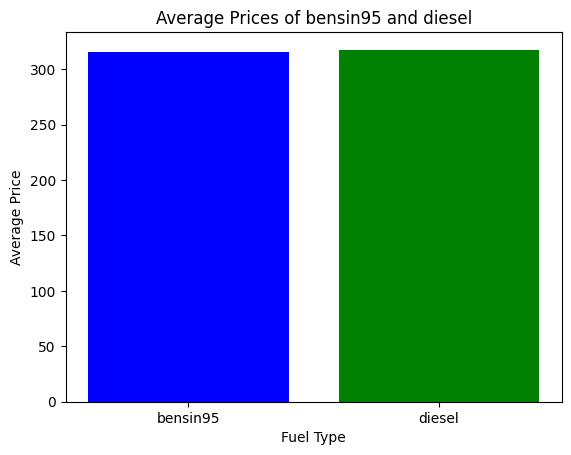

In [15]:
# Price Analysis:
# What is the average price of 'bensin95' and 'diesel' across all companies?
avg_bensin95 = petrol_data['bensin95'].mean()
print(avg_bensin95)

avg_diesel = petrol_data['diesel'].mean()
print(avg_diesel)


fuel_types = ['bensin95', 'diesel']
average_prices = [petrol_data[fuel_type].mean() for fuel_type in fuel_types]

plt.bar(fuel_types, average_prices, color=['blue', 'green'])
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Prices of bensin95 and diesel')
plt.show()

company
Costco Iceland    273.700000
Atlantsolía       309.936000
ÓB                312.417778
Orkan             314.147222
N1                319.500000
Olís              320.305000
Name: bensin95, dtype: float64
company
Costco Iceland    282.700000
Atlantsolía       313.592000
ÓB                315.268889
Orkan             316.647222
N1                320.227059
Olís              321.625000
Name: diesel, dtype: float64


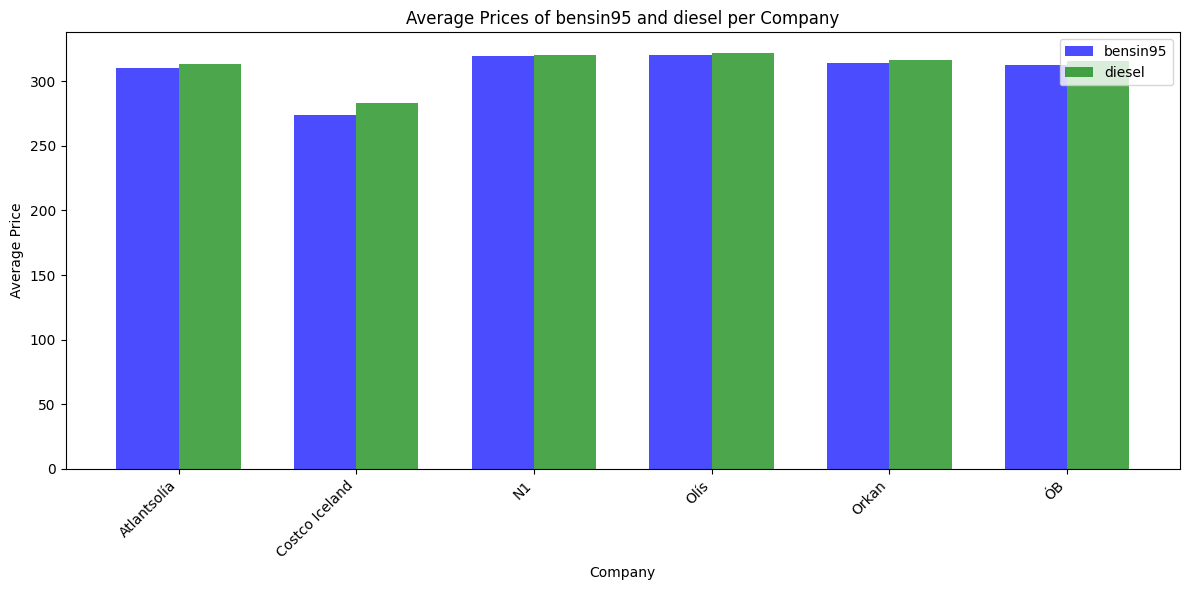

In [16]:
# Price Analysis:
# What is the average prize of each fuel type per company?
avg_company_bensin95 = petrol_data.groupby('company')['bensin95'].mean()
print(avg_company_bensin95.sort_values(ascending = True))

avg_company_diesel = petrol_data.groupby('company')['diesel'].mean()
print(avg_company_diesel.sort_values(ascending = True))

companies = avg_company_bensin95.index
bar_width = 0.35
index = np.arange(len(companies))

plt.figure(figsize=(12, 6))

plt.bar(index, avg_company_bensin95, width=bar_width, label='bensin95', color='blue', alpha=0.7)
plt.bar(index + bar_width, avg_company_diesel, width=bar_width, label='diesel', color='green', alpha=0.7)

plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Prices of bensin95 and diesel per Company')
plt.legend()
plt.xticks(index + bar_width / 2, companies, rotation=45, ha='right')
plt.tight_layout()
plt.show()

            company          name  bensin95
25   Costco Iceland       Kauptún     273.7
223           Orkan  Bústaðavegur     288.7
217           Orkan       Selfoss     288.7
197           Orkan    Mýrarvegur     288.7
183           Orkan    Skógarhlíð     288.7


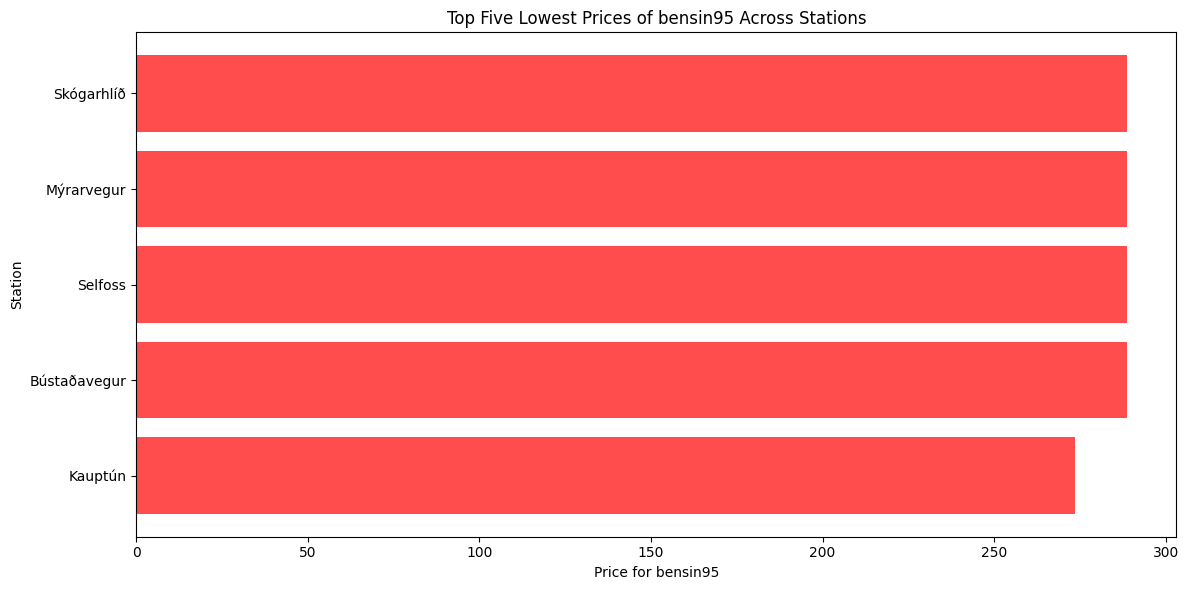

In [17]:
# Which gas station has the lowest price for bensin95 and diesel? 

low_price_station_bensin95 = petrol_data['bensin95'].sort_values()
lowest_prices_index = low_price_station_bensin95.index

result = petrol_data.loc[lowest_prices_index, ['company', 'name', 'bensin95']]

print(result.head(5))

# Select only the top five lowest prices for 'bensin95'
top_five_result = result.head(5)

plt.figure(figsize=(12, 6))

# Horizontal bar plot for 'bensin95'
plt.barh(top_five_result['name'], top_five_result['bensin95'], color='red', alpha=0.7)

plt.xlabel('Price for bensin95')
plt.ylabel('Station')
plt.title('Top Five Lowest Prices of bensin95 Across Stations')
plt.tight_layout()
plt.show()

            company          name  diesel
25   Costco Iceland       Kauptún   282.7
223           Orkan  Bústaðavegur   297.7
217           Orkan       Selfoss   297.7
197           Orkan    Mýrarvegur   297.7
183           Orkan    Skógarhlíð   297.7


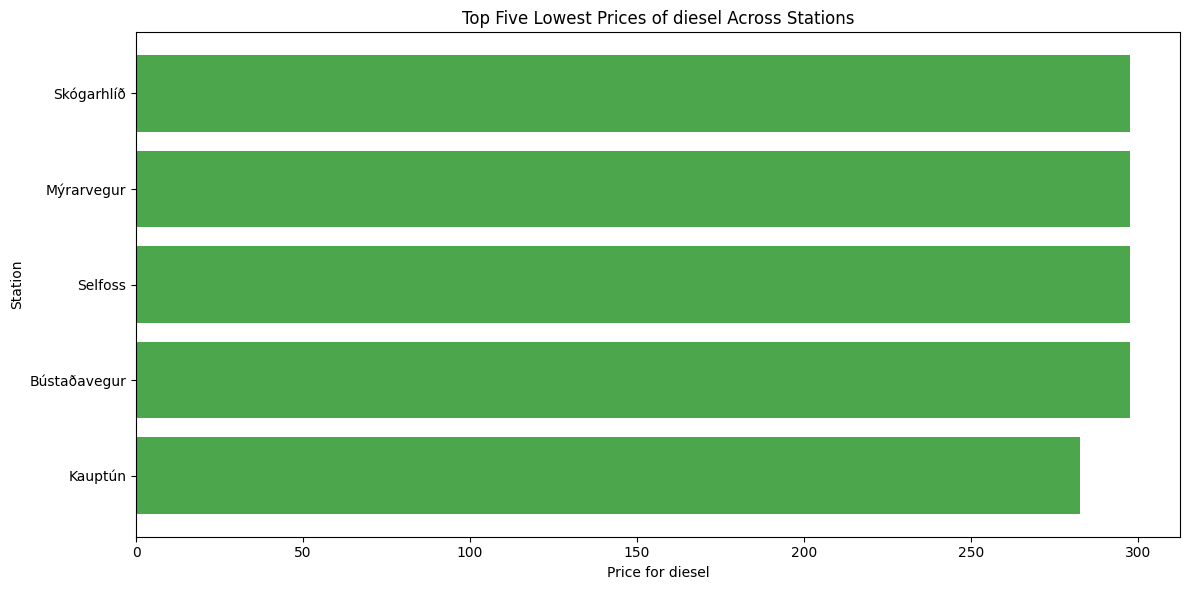

In [18]:
low_price_station_diesel = petrol_data['diesel'].sort_values()
lowest_prices_index = low_price_station_diesel.index

result_diesel = petrol_data.loc[lowest_prices_index, ['company', 'name', 'diesel']]

print(result_diesel.head(5))

# Select only the top five lowest prices for 'diesel'
top_five_result_diesel = result_diesel.head(5)

plt.figure(figsize=(12, 6))

# Horizontal bar plot for 'diesel'
plt.barh(top_five_result_diesel['name'], top_five_result_diesel['diesel'], color='green', alpha=0.7)

plt.xlabel('Price for diesel')
plt.ylabel('Station')
plt.title('Top Five Lowest Prices of diesel Across Stations')
plt.tight_layout()
plt.show()

company
N1                85
Orkan             72
ÓB                45
Atlantsolía       25
Olís              20
Costco Iceland     1
dtype: int64


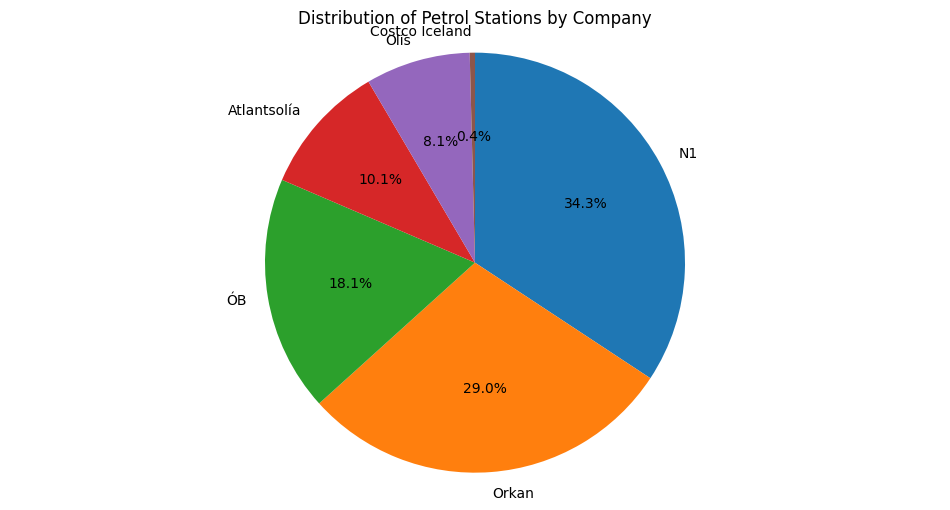

In [19]:
#Company Analysis:
    # Which company has the highest number of petrol stations in the dataset?

company_station_count = petrol_data.groupby('company').size().sort_values(ascending = False)
print(company_station_count)


plt.figure(figsize=(12, 6))

# Pie chart for company station count
company_station_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)

plt.axis('equal')  
plt.title('Distribution of Petrol Stations by Company')

plt.show()